# Import

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 999)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import re
import csv
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import string

/Users/hechengwang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
train = pd.read_csv("train.csv", header = 0)
test = pd.read_csv("test.csv", header = 0)

# Analysis

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


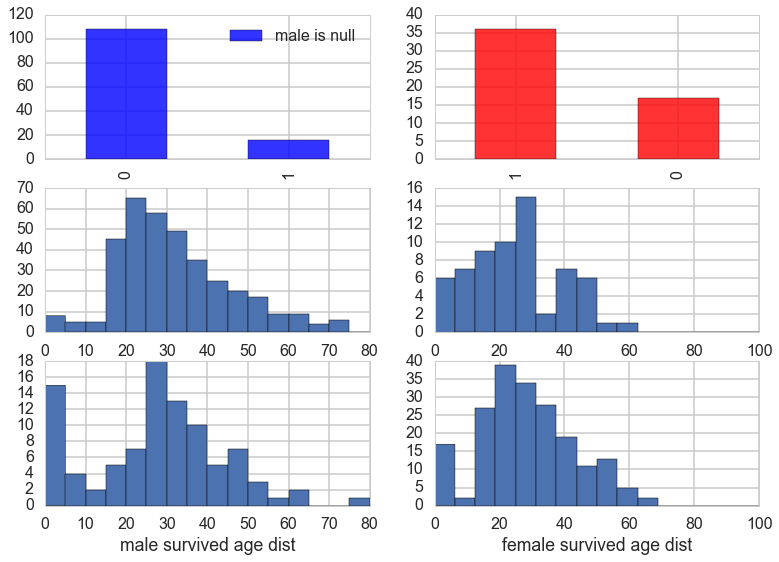

In [4]:
a = 0.8
plt.subplot(3,2,1)
male = train['Survived'][train['Sex'] == 'male'][train['Age'].isnull()].value_counts()
male.plot(kind = 'bar', label = 'male is null', alpha = a)
plt.legend()
plt.subplot(3,2,2)
female = train['Survived'][train['Sex'] == 'female'][train['Age'].isnull()].value_counts()
female.plot(kind = 'bar', label = 'female is null', color = 'r', alpha = a)

plt.subplot(3,2,3)
male_age1 = train['Age'][train['Sex'] == 'male'][train['Survived'] == 0].hist(bins = 16, range = (0,80))
male_age1.set_xlabel('male died age dist')

plt.subplot(3,2,4)
female_age1 = train['Age'][train['Sex'] == 'female'][train['Survived'] == 0].hist(bins = 16, range = (0,100))
female_age1.set_xlabel('female died age dist')

plt.subplot(3,2,5)
male_age2 = train['Age'][train['Sex'] == 'male'][train['Survived'] == 1].hist(bins = 16, range = (0,80))
male_age2.set_xlabel('male survived age dist')

plt.subplot(3,2,6)
female_age2 = train['Age'][train['Sex'] == 'female'][train['Survived'] == 1].hist(bins = 16, range = (0,100))
female_age2.set_xlabel('female survived age dist')
plt.show()

In [5]:
subset_0 = train[['Survived', 'Age', 'Pclass', 'Fare', 'male', 'female']].dropna()
sns.pairplot(subset_0, hue = 'Survived');

KeyError: "['male' 'female'] not in index"

In [ ]:
subset_1 = train[['Survived', 'Age', 'Pclass', 'Fare']][train['Sex'] == 'male'].dropna()
sns.pairplot(subset_1, hue = 'Survived');

In [ ]:
subset_2 = train[['Survived', 'Age', 'Pclass', 'Fare']][train['Sex'] == 'female'].dropna()
sns.pairplot(subset_2, hue = 'Survived');

In [ ]:
pd.crosstab(train['Cabin'].str.extract("(\w)").fillna(""), train['Survived'])

In [6]:
df = train.append(test, ignore_index= True)

In [7]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.00,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.00,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.00,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.00,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.00,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.00,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.00,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.00,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


In [107]:
def clean_data(df):
    
    #gender and embarked binarization
    df = pd.concat([df, pd.get_dummies(df['Sex'])], axis = 1)
    df = pd.concat([df, pd.get_dummies(df['Embarked'].fillna('S'), prefix= 'Embarked')], axis = 1)
    
    #create new feature called famsize
    df['FamilySize'] = df['SibSp'] + df['Parch']
    #fare fix
    df['Fare'] = df['Fare'].map(lambda x: np.nan if x==0 else x)
    df.loc[ (df.Fare.isnull())&(df.Pclass==1),'Fare'] =np.median(df[df['Pclass'] == 1]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==2),'Fare'] =np.median( df[df['Pclass'] == 2]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==3),'Fare'] = np.median(df[df['Pclass'] == 3]['Fare'].dropna())

    df['Fare_Per_Person'] = df['Fare'] / (df['FamilySize'] + 1.0)

    #title
    def substrings_in_string(big_string, substrings):
        for substring in substrings:
            if string.find(big_string, substring) != -1:
                return substring
        print big_string
        return np.nan

    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']
    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))

    #replacing all titles with mr, mrs, miss, master
    def replace_titles(x):
        title=x['Title']
        if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Master']:
            return 'Master'
        elif title in ['Countess', 'Mme','Mrs']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms','Miss']:
            return 'Miss'
        elif title =='Dr':
            if x['Sex']=='Male':
                return 'Mr'
            else:
                return 'Mrs'
        elif title =='':
            if x['Sex']=='Male':
                return 'Master'
            else:
                return 'Miss'
        else:
            return title

    df['Title']=df.apply(replace_titles, axis=1)
    df = pd.concat([df, pd.get_dummies(df['Title'], prefix = 'Title')], axis = 1)
    
    #age fix
    df['AgeFill'] = df['Age'].groupby(df['Title']).apply(lambda x: x.fillna(x.mean()))
    
    df['AgeCat']=df['AgeFill']
    df.loc[ (df.AgeFill<=10) ,'AgeCat'] = 'child'
    df.loc[ (df.AgeFill>60),'AgeCat'] = 'aged'
    df.loc[ (df.AgeFill>10) & (df.AgeFill <=30) ,'AgeCat'] = 'adult'
    df.loc[ (df.AgeFill>30) & (df.AgeFill <=60) ,'AgeCat'] = 'senior'
    df = pd.concat([df, pd.get_dummies(df['AgeCat'], prefix = 'Age_Cat')], axis = 1)
    
    #cabin fix
    df['Cabin_Category'] = df['Cabin'].str.extract("(\w)")
    df.loc[ (df.Cabin_Category.isnull())&(df.Pclass==1),'Cabin_Category'] = "C"
    df.loc[ (df.Cabin_Category.isnull())&(df.Pclass==2),'Cabin_Category'] = "F"
    df.loc[ (df.Cabin_Category.isnull())&(df.Pclass==3),'Cabin_Category'] = "F"
    df.loc[ (df.Cabin_Category == "T"), 'Cabin_Category'] = "F"
    df = pd.concat([df, pd.get_dummies(df['Cabin_Category'], prefix = 'Cabin_Cat')], axis = 1)
    
    
    #added features
    df['AgeClass']=df['AgeFill']*df['Pclass']
    df['ClassFare']=df['Pclass']*df['Fare_Per_Person']
    df['HighLow']=df['Pclass']
    df.loc[ (df.Fare_Per_Person<8) ,'HighLow'] = 0
    df.loc[ (df.Fare_Per_Person>=8) ,'HighLow'] = 1
    
#    le = LabelEncoder()
#     le.fit(df['Name'].apply(lambda x: x.split(",")[0]))
#     df['Family_Name'] = le.transform(df['Name'].apply(lambda x: x.split(",")[0]))
    
#     #familyid
#     df['Family_Name'] = df['Name'].apply(lambda x: x.split(",")[0])
#     df['FamilySize'] = df['SibSp'] + df['Parch'] + 1.0
#     df['FamId'] = df['FamilySize'].astype(int).astype(str) + df['Family_Name']
#     df['FamId'] = np.where(df['FamilySize'] < 3, 'Small', df['FamId'])
#     small_fams = df['FamId'].value_counts()[df['FamId'].value_counts() < 3].index
#     df['FamId'] = df['FamId'].apply(lambda x: 'Small' if x in small_fams else x)
#     df = pd.concat([df, pd.get_dummies(df['FamId'], prefix = 'Id')], axis = 1)
    
    
    #ticket
    df['Ticket_New'] = df['Ticket'].apply(lambda x: x[:1])
    df = pd.concat([df, pd.get_dummies(df['Ticket_New'], prefix = "Ticket")], axis = 1)

    df = df.drop(['Name', 'Parch', 'SibSp', 'FamilySize', 'PassengerId', 'Ticket_New',
                  'Age', 'AgeCat', 'Sex', 'Embarked', 'Cabin', 'Cabin_Category', 'Title', 'Ticket'], axis = 1)
    return df

In [108]:
df_clean = clean_data(df)
x = df_clean[:len(train)].drop('Survived', axis = 1)
y = df_clean['Survived'][:len(train)]

test_new = df_clean[len(train):].drop('Survived', axis = 1)

# Prediction

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
import scipy
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import StratifiedShuffleSplit

In [126]:
print x.dtypes
to_drop = []
x_subset = x.drop(to_drop, axis = 1)
test_new_subset = test_new.drop(to_drop, axis = 1)
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_subset, y, test_size = .2)

Fare               float64
Pclass               int64
female             float64
male               float64
Embarked_C         float64
Embarked_Q         float64
Embarked_S         float64
Fare_Per_Person    float64
Title_Master       float64
Title_Miss         float64
Title_Mr           float64
Title_Mrs          float64
AgeFill            float64
Age_Cat_adult      float64
Age_Cat_aged       float64
Age_Cat_child      float64
Age_Cat_senior     float64
Cabin_Cat_A        float64
Cabin_Cat_B        float64
Cabin_Cat_C        float64
Cabin_Cat_D        float64
Cabin_Cat_E        float64
Cabin_Cat_F        float64
Cabin_Cat_G        float64
AgeClass           float64
ClassFare          float64
HighLow              int64
Ticket_1           float64
Ticket_2           float64
Ticket_3           float64
Ticket_4           float64
Ticket_5           float64
Ticket_6           float64
Ticket_7           float64
Ticket_8           float64
Ticket_9           float64
Ticket_A           float64
T

In [130]:
clf=RandomForestClassifier(criterion='entropy', min_samples_split=1,
  min_samples_leaf=1, bootstrap=False, oob_score=False, n_jobs=1, random_state=0)
parameters = {'n_estimators':[500],
              'max_depth':[5, 10]}
fitmodel = GridSearchCV(clf, param_grid=parameters, cv=StratifiedShuffleSplit(y_train, \
n_iter=10, test_size=0.2, train_size=None), scoring="accuracy")
fitmodel.fit(x_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(RandomForestClassifier(bootstrap=False, class_weight=None,
             criterion='entropy', max_depth=5, max_features='auto',
             max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
             min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
             oob_score=False, random_state=0, verbose=0, warm_start=False),
 {'max_depth': 5, 'n_estimators': 500},
 0.84265734265734271,
 [mean: 0.84266, std: 0.01221, params: {'n_estimators': 500, 'max_depth': 5},
  mean: 0.82098, std: 0.02103, params: {'n_estimators': 500, 'max_depth': 10}])

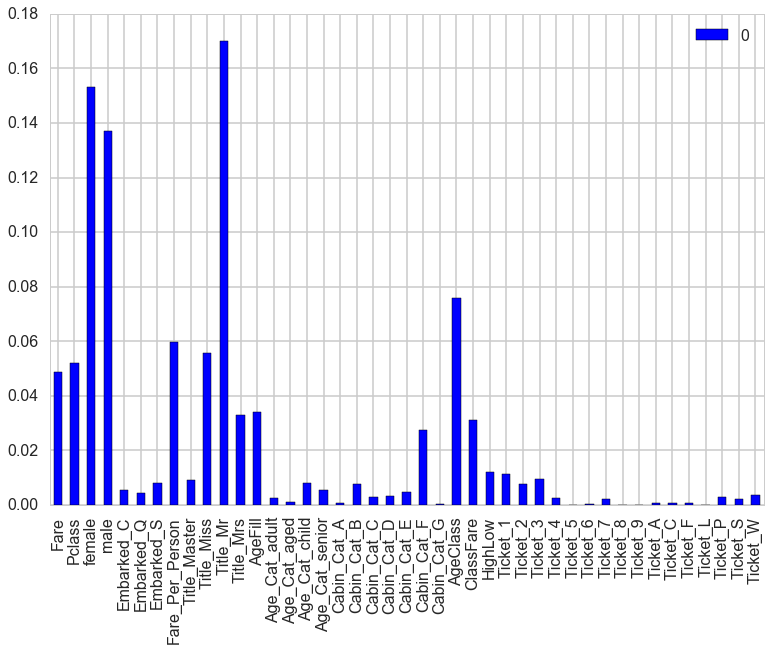

In [131]:
pd.DataFrame((fitmodel.best_estimator_.feature_importances_), index=x_train.columns).plot(kind = 'bar')

In [132]:
clf3=LogisticRegression()
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 1]}
fitmodel3 = GridSearchCV(clf3, param_grid=parameters, cv=StratifiedShuffleSplit(y_train, \
n_iter=10, test_size=0.2, train_size=None), scoring="accuracy")
fitmodel3.fit(x_train, y_train)
fitmodel3.best_estimator_, fitmodel3.best_params_, fitmodel3.best_score_, fitmodel3.grid_scores_

(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 1},
 0.83496503496503494,
 [mean: 0.76294, std: 0.02788, params: {'C': 0.01},
  mean: 0.80490, std: 0.03055, params: {'C': 0.05},
  mean: 0.82098, std: 0.03414, params: {'C': 0.1},
  mean: 0.83217, std: 0.01769, params: {'C': 0.5},
  mean: 0.83497, std: 0.01829, params: {'C': 1}])

In [133]:
clf = fitmodel.best_estimator_
x_train_pred = clf.predict(x_train)
x_test_pred = clf.predict(x_test)
print "train-test accuracy: %s - %s" %(accuracy_score(x_train_pred, y_train), accuracy_score(x_test_pred, y_test))

train-test accuracy: 0.863764044944 - 0.787709497207


In [134]:
for i in range(1, 11):
    clf=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=i, min_samples_split=1,
                               min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=0,
                               verbose=0)
    clf.fit(x_train, y_train)
    x_train_pred = clf.predict(x_train)
    x_test_pred = clf.predict(x_test)
    print "train-test accuracy: %s - %s %s" %(accuracy_score(x_train_pred, y_train), accuracy_score(x_test_pred, y_test), i)

train-test accuracy: 0.787921348315 - 0.748603351955 1
train-test accuracy: 0.799157303371 - 0.748603351955 2
train-test accuracy: 0.825842696629 - 0.765363128492 3
train-test accuracy: 0.851123595506 - 0.782122905028 4
train-test accuracy: 0.863764044944 - 0.787709497207 5
train-test accuracy: 0.88202247191 - 0.804469273743 6
train-test accuracy: 0.917134831461 - 0.815642458101 7
train-test accuracy: 0.943820224719 - 0.793296089385 8
train-test accuracy: 0.946629213483 - 0.793296089385 9
train-test accuracy: 0.955056179775 - 0.798882681564 10


In [137]:
for i in range(1, 11):
    clf=XGBClassifier(n_estimators=500, max_depth = i, reg_lambda = 1, reg_alpha = 1, learning_rate = 0.1)
    clf.fit(x_train, y_train)
    x_train_pred = clf.predict(x_train)
    x_test_pred = clf.predict(x_test)
    print "train-test accuracy: %s - %s %s" %(accuracy_score(x_train_pred, y_train), accuracy_score(x_test_pred, y_test), i)

train-test accuracy: 0.86095505618 - 0.787709497207 1
train-test accuracy: 0.907303370787 - 0.798882681564 2
train-test accuracy: 0.935393258427 - 0.77094972067 3
train-test accuracy: 0.956460674157 - 0.787709497207 4
train-test accuracy: 0.963483146067 - 0.793296089385 5
train-test accuracy: 0.973314606742 - 0.77094972067 6
train-test accuracy: 0.969101123596 - 0.759776536313 7
train-test accuracy: 0.970505617978 - 0.765363128492 8
train-test accuracy: 0.973314606742 - 0.759776536313 9
train-test accuracy: 0.973314606742 - 0.759776536313 10


In [135]:
clf=fitmodel.best_estimator_
output = clf.predict(test_new_subset).astype(int)
test_ids = test['PassengerId']

In [136]:
predictions_file = open("titanic_20160718.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(test_ids, output))
predictions_file.close()

This will result in a prediction accuracy of 79.904%, which is better but not there yet :(